# Exemple fournit par Dipy sur leur site web

In [1]:
import numpy as np
from nibabel import trackvis as tv
from dipy.segment.clustering import QuickBundles
from dipy.io.pickles import save_pickle
from dipy.data import get_data
from dipy.viz import fvtk

In [2]:
fname = get_data('fornix')

In [3]:
streams, hdr = tv.read(fname)
streamlines = [i[0] for i in streams]

In [4]:
qb = QuickBundles(threshold=10.)
clusters = qb.cluster(streamlines)

In [5]:
print("Nb. clusters:", len(clusters))
print("Cluster sizes:", map(len, clusters))
print("Small clusters:", clusters < 10)
print("Streamlines indices of the first cluster:\n", clusters[0].indices)
print("Centroid of the last cluster:\n", clusters[-1].centroid)

('Nb. clusters:', 4)
('Cluster sizes:', [61, 191, 47, 1])
('Small clusters:', array([False, False, False,  True], dtype=bool))
('Streamlines indices of the first cluster:\n', [0, 7, 8, 10, 11, 12, 13, 14, 15, 18, 26, 30, 33, 35, 41, 65, 66, 85, 100, 101, 105, 115, 116, 119, 122, 123, 124, 125, 126, 128, 129, 135, 139, 142, 143, 144, 148, 151, 159, 167, 175, 180, 181, 185, 200, 208, 210, 224, 237, 246, 249, 251, 256, 267, 270, 280, 284, 293, 296, 297, 299])
('Centroid of the last cluster:\n', array([[  84.83773804,  117.92590332,   77.32278442],
       [  86.10850525,  115.84362793,   81.91885376],
       [  86.40357208,  112.25676727,   85.72930145],
       [  86.48336792,  107.60327911,   88.13782501],
       [  86.23897552,  102.5100708 ,   89.29447174],
       [  85.04563904,   97.46020508,   88.54240417],
       [  82.60240173,   93.14851379,   86.84208679],
       [  78.98937225,   89.57682037,   85.63652039],
       [  74.72344208,   86.60827637,   84.9391861 ],
       [  70.4084

In [8]:
ren = fvtk.ren()
ren.SetBackground(1, 1, 1)
#fvtk.add(ren, fvtk.streamtube(streamlines, fvtk.colors.white))
fvtk.record(ren, n_frames=1, out_path='fornix_initial.png', size=(600, 600))

In [9]:
colormap = fvtk.create_colormap(np.arange(len(clusters)))
fvtk.clear(ren)
ren.SetBackground(1, 1, 1)
#fvtk.add(ren, fvtk.streamtube(streamlines, fvtk.colors.white, opacity=0.05))
fvtk.add(ren, fvtk.streamtube(clusters.centroids, colormap, linewidth=0.4))
fvtk.record(ren, n_frames=1, out_path='fornix_centroids.png', size=(600, 600))

In [10]:
colormap_full = np.ones((len(streamlines), 3))
for cluster, color in zip(clusters, colormap):
    colormap_full[cluster.indices] = color

fvtk.clear(ren)
ren.SetBackground(1, 1, 1)
#fvtk.add(ren, fvtk.streamtube(streamlines, colormap_full))
fvtk.record(ren, n_frames=1, out_path='fornix_clusters.png', size=(600, 600))

In [ ]:
save_pickle('QB.pkl', clusters)

# Example de chargement d'une tracto à nous

In [5]:
import os
import sys
from math import sqrt, acos, degrees
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

from nibabel import trackvis as tv
import dipy
from dipy.segment.clustering import QuickBundles
from dipy.io.pickles import save_pickle
from dipy.data import get_data
from dipy.viz import fvtk
import nipype.interfaces.mrtrix as mrt
from dipy.segment.metric import ResampleFeature
from dipy.segment.metric import AveragePointwiseEuclideanMetric
from dipy.tracking.utils import length
from dipy.tracking.metrics import downsample
from dipy.tracking.distances import approx_polygon_track

In [3]:
NAS="tupac"
protocole="alexcis"
subject="t_AD25"

print "/NAS/"+NAS+"/protocoles/"+protocole+"/FS53/"+subject+"/dti/1.5M_SIFT.tck"

/NAS/tupac/protocoles/alexcis/FS53/t_AD25/dti/1.5M_SIFT.tck


In [8]:
### Conversion au format .trk
print "\nConversion au format .trk ..."
tck2trk = mrt.MRTrix2TrackVis()

NAS="tupac"
protocole="alexcis"
subject="t_AD25"

# whole_brain_6_1500000.tck eq .1.5M_SIFT.tck

tck2trk.inputs.in_file = "/NAS/"+NAS+"/protocoles/"+protocole+"/FS53/"+subject+"/dti/LongueFibres_SIFT.tck"
tck2trk.inputs.image_file = "/NAS/"+NAS+"/protocoles/"+protocole+"/FS53/"+subject+"/dti/b0.nii"
tck2trk.inputs.out_filename = "/NAS/"+NAS+"/protocoles/"+protocole+"/FS53/"+subject+"/dti/LongueFibres_SIFT_sup50.trk"
tck2trk.run()  


Conversion au format .trk ...
170904-17:42:39,516 interface INFO:
	 Reading header data...
170904-17:42:39,516 interface INFO:
	 ...adding "/NAS/tupac/protocoles/alexcis/FS53/t_AD25/dti/5TT.mif" to header for key "act"
170904-17:42:39,517 interface INFO:
	 ...adding "1" to header for key "backtrack"
170904-17:42:39,517 interface INFO:
	 ...adding "1" to header for key "crop_at_gmwmi"
170904-17:42:39,518 interface INFO:
	 ...adding "3" to header for key "downsample_factor"
170904-17:42:39,518 interface INFO:
	 ...adding "0.25" to header for key "fod_power"
170904-17:42:39,519 interface INFO:
	 ...adding "0.0599999987" to header for key "init_threshold"
170904-17:42:39,519 interface INFO:
	 ...adding "6" to header for key "lmax"
170904-17:42:39,520 interface INFO:
	 ...adding "45" to header for key "max_angle"
170904-17:42:39,520 interface INFO:
	 ...adding "1500000000" to header for key "max_num_attempts"
170904-17:42:39,521 interface INFO:
	 ...adding "15000000" to header for key "max

In [9]:
### Chargement des fibres
print "\nChargement des fibres..." 
streams, hdr = tv.read("/NAS/"+NAS+"/protocoles/"+protocole+"/FS53/"+subject+"/dti/LongueFibres_SIFT_sup50.trk") #
streamlines = [i[0] for i in streams]


Chargement des fibres...


In [65]:
### QuickBundles
print "\nPerform QuickBundles clustering using the MDF metric and a 5mm distance threshold..."
feature = ResampleFeature(nb_points=240)
metric = AveragePointwiseEuclideanMetric(feature=feature)  # a.k.a. MDF
qb = QuickBundles(threshold=10, metric=metric)
qb.max_nb_clusters = 4
clusters = qb.cluster(streamlines)
print clusters.centroids[0][1]


Perform QuickBundles clustering using the MDF metric and a 5mm distance threshold...
[ 138.53337097  100.26016235   60.81987   ]


In [2]:
print("Nb. clusters:", len(clusters))
test=map(len, clusters)
print("Cluster sizes:", test)
print clusters.clusters_sizes()
#print(len(clusters[0]))
#print(len(colormap))

print np.argmax(test)
print len(clusters[np.argmax(test)])
#print(clusters.centroids[0])
#print(clusters.centroids[10].length())
#c_streamlines = compress_streamlines(streamlines, tol_error=0.

lengths = list(length(streamlines))
fig_hist, ax = plt.subplots(1)
ax.hist(lengths, color='burlywood')
ax.set_xlabel('Length')
ax.set_ylabel('Count')
plt.show()
plt.legend()
plt.savefig('length_histogram.png')

#n_pts = [len(streamline) for streamline in streamlines]
print len(streamlines[0:3]) 
print lengths[0:3]
print list(length(streamlines[0:1]))

NameError: name 'clusters' is not defined

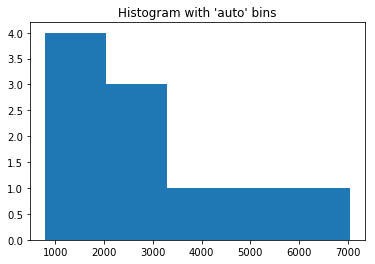

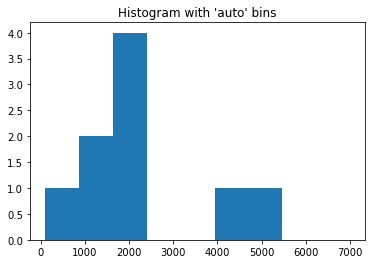

In [233]:
plt.hist(test, bins='auto')  
plt.title("Histogram with 'auto' bins")
plt.show()

plt.hist(clusters.clusters_sizes(), bins='auto',range=(100,7000))  
plt.title("Histogram with 'auto' bins")
plt.show()

In [164]:
test2=np.sort(list(set(test)))[-20:]
test3=np.asarray(np.zeros(0))

for ind in np.unique(test2):
    test3=np.append(test3,np.where(test==ind)[0])

test3=np.flip(test3,0)
#print clusters[int(test3[0])].centroid
print len(clusters.centroids[int(test3[0])])
print clusters.centroids[int(test3[0])]

240
[[ 134.40313721  117.90766907   44.11375427]
 [ 134.53521729  118.02346039   44.36621857]
 [ 134.67121887  118.13749695   44.61802673]
 [ 134.81034851  118.25021362   44.86991501]
 [ 134.95294189  118.36027527   45.12106323]
 [ 135.10040283  118.46865082   45.37186432]
 [ 135.25222778  118.57689667   45.62097549]
 [ 135.40882874  118.68274689   45.86952591]
 [ 135.5692749   118.78747559   46.11665726]
 [ 135.73320007  118.89125824   46.36292267]
 [ 135.90113831  118.99370575   46.60782623]
 [ 136.07281494  119.09521484   46.85154724]
 [ 136.24873352  119.19535828   47.09418869]
 [ 136.42810059  119.29444122   47.33633804]
 [ 136.60816956  119.39390564   47.57792282]
 [ 136.79173279  119.49324799   47.81884766]
 [ 136.97862244  119.59072876   48.05909348]
 [ 137.16687012  119.68656921   48.29901123]
 [ 137.35821533  119.77996826   48.53829956]
 [ 137.552948    119.87211609   48.77651215]
 [ 137.74880981  119.96352386   49.01423645]
 [ 137.94615173  120.0526123    49.25215149]
 [ 138

In [53]:
large_clusters = clusters.get_large_clusters(1000)
print len(large_clusters[0])
print len(large_clusters[1])
print large_clusters[0][0].shape

print clusters.centroids[3]
print clusters[0]

5743
3641
(114, 3)
[[ 118.29322052  165.06713867   67.11540985]
 [ 118.35609436  164.98368835   67.11138916]
 [ 118.41938782  164.89974976   67.10881042]
 [ 118.48249817  164.81582642   67.10625458]
 [ 118.54595184  164.73199463   67.10527039]
 [ 118.61008453  164.6486969    67.10514832]
 [ 118.67498779  164.56585693   67.10673523]
 [ 118.74040985  164.48419189   67.10928345]
 [ 118.80599976  164.4017334    67.11289978]
 [ 118.87203979  164.31962585   67.11753845]
 [ 118.93863678  164.23817444   67.1232605 ]
 [ 119.00553894  164.15548706   67.1295929 ]
 [ 119.07316589  164.07441711   67.13632965]
 [ 119.14096069  163.99281311   67.14318085]
 [ 119.21002197  163.91242981   67.1503067 ]
 [ 119.27902222  163.83110046   67.15774536]
 [ 119.34867859  163.75007629   67.16527557]
 [ 119.41879272  163.66955566   67.17238617]
 [ 119.48929596  163.58833313   67.17959595]
 [ 119.5602951   163.50775146   67.18635559]
 [ 119.63220215  163.42666626   67.19258118]
 [ 119.70465851  163.34580994   67.1

In [6]:
ren = fvtk.ren()
colormap = fvtk.create_colormap(np.arange(1))
print colormap
ren.SetBackground(0, 0, 0)
fvtk.add(ren, fvtk.streamtube(clusters.centroids,linewidth=0.5));

fvtk.add(ren, fvtk.streamtube(clusters[0],fvtk.colors.white,linewidth=0.2,opacity=0.1));
fvtk.add(ren, fvtk.streamtube(clusters[1],fvtk.colors.red,linewidth=0.2,opacity=0.1));
fvtk.add(ren, fvtk.streamtube(clusters[2],fvtk.colors.green,linewidth=0.2,opacity=0.1));
fvtk.add(ren, fvtk.streamtube(clusters[3],fvtk.colors.blue,linewidth=0.2,opacity=0.1));

#lines = [np.random.rand(10, 3), np.random.rand(20, 3)]
#fvtk.add(ren, fvtk.streamtube(lines));
fvtk.show(ren)
#fvtk.record(ren, n_frames=1, out_path="/NAS/"+NAS+"/protocoles/"+protocole+"/FS53/"+subject+"/dti/CC_clusters.png", size=(600, 600))

[[ 0.940015  0.975158  0.131326]]


NameError: name 'clusters' is not defined

In [3]:
ren = fvtk.ren()
#colormap = fvtk.create_colormap(np.arange(len(clusters)))
ren.SetBackground(0, 0, 0)#colormap[60:65]
fvtk.add(ren, fvtk.streamtube(streamlines,fvtk.colors.white,linewidth=0.2,opacity=0.1));
fvtk.show(ren)

#fvtk.add(ren, fvtk.streamtube(clusters.centroids,fvtk.colors.white, linewidth=0.4))
#fvtk.record(ren, n_frames=1, out_path='/NAS/tupac/protocoles/healthy_volunteers/FS53/T02S01/dti/whole_brain_clusters_60_2.png', size=(600, 600))

NameError: name 'fvtk' is not defined